<a href="https://colab.research.google.com/github/JyotsnaPatil27/Jyo_code/blob/master/Astro_research/ASS4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.fftpack as syfp
import scipy.signal as signal
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = open("/content/drive/My Drive/sub_pulsedrift.dat","r").readlines()
len(data)

4896938

In [ ]:
file_path = "/content/drive/My Drive/sub_pulsedrift.dat"
df = pd.read_csv(file_path, skiprows =1, delim_whitespace=True)
df

,Pulse_no,Bins,Data
0,1,0,97.847618
1,1,1,100.719048
2,1,2,99.190476
3,1,3,98.161903
4,1,4,99.176193
...,...,...,...
4896931,972,5033,0.000000
4896932,972,5034,0.000000
4896933,972,5035,0.000000
4896934,972,5036,0.000000


In [ ]:
#Pulsar_observation_parameters
line =data[0]
Pulsar_observation_parameters = line
Pulsar_observation_parameters

'#GMRT  PSR J0820-1350  MJD=56718.7636637  NBINS=5038  TRES=0.24576ms  FREQ=317.0  BW=16.667 \n'

In [ ]:
Pulse = df['Pulse_no'].value_counts()
Pulse

972    5038
304    5038
332    5038
331    5038
330    5038
       ... 
644    5038
643    5038
642    5038
641    5038
1      5038
Name: Pulse_no, Length: 972, dtype: int64

In [ ]:
data2 = df[:1511400]
data2

,Pulse_no,Bins,Data
0,1,0,97.847618
1,1,1,100.719048
2,1,2,99.190476
3,1,3,98.161903
4,1,4,99.176193
...,...,...,...
1511395,300,5033,98.852379
1511396,300,5034,99.747620
1511397,300,5035,98.714287
1511398,300,5036,95.938095


In [ ]:
time_series = data2.iloc[:,[2]]
time_series

,Data
0,97.847618
1,100.719048
2,99.190476
3,98.161903
4,99.176193
...,...
1511395,98.852379
1511396,99.747620
1511397,98.714287
1511398,95.938095


In [ ]:
Nbins = 5038
Tres = 0.24576
Period = Nbins * Tres
Period

1238.13888

In [ ]:
Pulse_bins = data2.iloc[:,[1]]
Pulse_bins.shape


(1511400, 1)

In [ ]:
phase_i = Pulse_bins/5038
phase_i

,Bins
0,0.000000
1,0.000198
2,0.000397
3,0.000595
4,0.000794
...,...
1511395,0.999008
1511396,0.999206
1511397,0.999405
1511398,0.999603


In [ ]:
time_series_array = np.array(time_series)
phase_array = np.array(phase_i)


In [ ]:
data2.insert(loc=2, column='phase', value=phase_i)

In [ ]:
data2

,Pulse_no,Bins,phase,Data
0,1,0,0.000000,97.847618
1,1,1,0.000198,100.719048
2,1,2,0.000397,99.190476
3,1,3,0.000595,98.161903
4,1,4,0.000794,99.176193
...,...,...,...,...
1511395,300,5033,0.999008,98.852379
1511396,300,5034,0.999206,99.747620
1511397,300,5035,0.999405,98.714287
1511398,300,5036,0.999603,95.938095


In [ ]:
data3 = data2.pivot(index='Pulse_no', columns='phase', values='Data')
data3

phase,0.000000,0.000198,0.000397,0.000595,0.000794,0.000992,0.001191,0.001389,0.001588,0.001786,0.001985,0.002183,0.002382,0.002580,0.002779,0.002977,0.003176,0.003374,0.003573,0.003771,0.003970,0.004168,0.004367,0.004565,0.004764,0.004962,0.005161,0.005359,0.005558,0.005756,0.005955,0.006153,0.006352,0.006550,0.006749,0.006947,0.007146,0.007344,0.007543,0.007741,...,0.992060,0.992259,0.992457,0.992656,0.992854,0.993053,0.993251,0.993450,0.993648,0.993847,0.994045,0.994244,0.994442,0.994641,0.994839,0.995038,0.995236,0.995435,0.995633,0.995832,0.996030,0.996229,0.996427,0.996626,0.996824,0.997023,0.997221,0.997420,0.997618,0.997817,0.998015,0.998214,0.998412,0.998611,0.998809,0.999008,0.999206,0.999405,0.999603,0.999802
Pulse_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,97.847618,100.719048,99.190476,98.161903,99.176193,99.019051,101.690476,99.109528,101.319046,99.719048,97.123810,98.042854,97.438095,100.780952,97.514282,98.385712,96.304764,98.366669,99.266670,97.409523,99.738098,100.671425,96.371429,99.328575,97.533333,96.861908,98.114288,98.609528,99.947617,96.980949,99.695236,97.380951,98.390472,100.000000,102.547623,99.938095,97.123810,100.066666,99.752380,96.833336,...,99.514282,103.490479,99.661903,99.442856,101.257141,100.923813,98.323807,96.433334,101.395241,97.785713,97.647621,97.666664,97.380951,101.433334,98.971428,101.328575,97.195236,98.790474,100.447617,99.809524,97.371429,98.604759,98.809524,100.333336,96.657143,100.085716,99.314285,99.609528,100.433334,100.023811,97.885712,98.985718,98.809524,96.628571,99.438095,99.366669,97.400002,97.585716,99.014282,97.285713
2,100.133331,98.495239,98.142860,96.290474,96.166664,94.895241,99.452377,94.842857,97.314285,96.509521,99.128571,98.723808,97.385712,99.714287,99.671425,96.219048,97.209526,99.009521,100.285713,98.242859,96.590477,97.566666,98.133331,99.300003,99.785713,96.890472,97.709526,98.566666,96.252380,98.828575,99.814285,96.971428,95.023811,98.042854,96.142860,99.442856,100.519051,101.166664,99.109528,99.261902,...,102.119049,98.223808,101.519051,97.919044,97.666664,96.957146,98.119049,99.909523,95.976189,97.085716,98.323807,101.428574,96.766670,96.599998,99.023811,100.947617,97.490479,98.195236,97.209526,97.314285,97.861908,98.876190,97.423813,97.738098,99.266670,96.842857,98.466667,98.947617,96.585716,99.695236,98.785713,98.009521,94.300003,97.257141,98.157143,98.161903,99.457146,94.638092,98.300003,97.728569
3,97.585716,97.233330,99.633331,100.328575,98.861908,99.285713,97.438095,94.371429,95.952377,101.280952,100.457146,99.719048,98.314285,97.457146,95.119049,99.019051,97.852379,96.642860,99.757141,97.261902,97.261902,98.052383,99.666664,99.519051,100.895241,94.261902,98.285713,98.061905,98.495239,96.423813,99.199997,101.400002,95.976189,98.461906,99.571426,100.599998,99.552383,96.571426,98.809524,98.028572,...,97.866669,99.900002,98.695236,97.571426,97.123810,99.661903,103.004761,98.766670,97.780952,100.047623,98.314285,100.990479,98.480949,94.347618,98.147621,100.352379,98.447617,100.809524,98.309524,100.028572,101.038094,98.633331,97.271431,100.295235,98.238098,101.876190,97.976189,100.742859,100.361908,95.666664,98.909523,96.995239,99.904762,97.866669,97.957146,98.347618,99.961906,97.995239,98.447617,97.971428
4,101.419044,99.004761,97.228569,103.738098,100.109528,100.461906,96.623810,98.519051,98.428574,97.880951,96.604759,96.761902,99.861908,97.552383,98.295235,98.976189,98.533333,98.223808,101.385712,95.933334,100.442856,97.733330,94.866669,95.776192,101.461906,97.319046,97.138092,98.152382,103.304764,98.409523,97.004761,97.438095,98.204765,96.800003,97.542854,99.790474,99.938095,99.319046,97.776192,97.699997,...,94.238098,100.404762,100.914284,96.157143,102.319046,98.376190,97.366669,97.090477,98.342857,97.900002,97.157143,97.685715,103.742859,96.109528,97.142860,97.447617,99.552383,99.676193,99.628571,96.895241,97.114288,100.833336,97.357140,98.680954,98.038094,98.604759,99.109528,98.166664,101.109528,97.78571

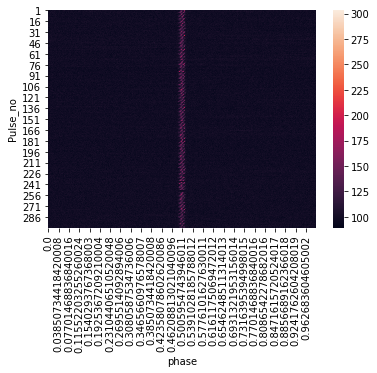

In [ ]:
import seaborn as sns
sns.heatmap(data3)

In [ ]:
data4 = data3.iloc[:,2420:2620]
data4

phase,0.480349,0.480548,0.480746,0.480945,0.481143,0.481342,0.481540,0.481739,0.481937,0.482136,0.482334,0.482533,0.482731,0.482930,0.483128,0.483327,0.483525,0.483724,0.483922,0.484121,0.484319,0.484518,0.484716,0.484915,0.485113,0.485312,0.485510,0.485709,0.485907,0.486106,0.486304,0.486503,0.486701,0.486900,0.487098,0.487297,0.487495,0.487694,0.487892,0.488091,...,0.512108,0.512306,0.512505,0.512703,0.512902,0.513100,0.513299,0.513497,0.513696,0.513894,0.514093,0.514291,0.514490,0.514688,0.514887,0.515085,0.515284,0.515482,0.515681,0.515879,0.516078,0.516276,0.516475,0.516673,0.516872,0.517070,0.517269,0.517467,0.517666,0.517864,0.518063,0.518261,0.518460,0.518658,0.518857,0.519055,0.519254,0.519452,0.519651,0.519849
Pulse_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,98.642860,97.680954,99.919044,100.280952,101.157143,99.085716,99.871429,98.219048,98.261902,98.685715,102.542854,99.695236,99.942856,102.261902,99.290474,101.714287,97.990479,100.180954,97.352379,100.671425,99.428574,98.961906,98.595238,103.414284,101.128571,103.057144,99.900002,98.952377,99.138092,101.204765,104.400002,101.776192,101.719048,102.004761,107.438095,105.828575,104.704765,102.890472,107.571426,106.309525,...,109.657143,102.319046,101.809524,106.009522,105.790474,100.214287,102.819046,102.242859,105.190475,105.766670,104.080956,106.461906,104.847618,102.747620,104.280952,103.057144,102.552383,102.071426,105.080955,101.433334,102.190476,100.042854,101.347618,99.861908,100.428574,99.576187,99.490479,102.252380,98.485718,101.599998,101.261902,101.028572,97.304764,99.904762,99.704765,95.895241,100.238098,99.380951,98.585716,98.733330
2,98.404762,99.723808,99.861908,100.642860,96.680954,99.647621,97.890472,101.390472,100.133331,98.919044,98.476189,97.933334,98.566666,100.257141,98.861908,97.390472,99.757141,98.352379,99.661903,95.847618,100.900002,98.480949,101.309524,96.409523,96.980949,102.728569,101.790474,99.919044,97.523811,101.333336,98.885712,98.166664,101.285713,102.228569,100.804764,98.785713,99.614288,96.095238,100.923813,97.061905,...,129.790482,124.028572,122.495239,118.304764,112.704765,114.366669,109.671425,111.166664,111.090477,108.747620,107.009522,106.099999,106.838097,105.814285,102.728569,103.995239,105.676193,102.928574,105.619049,100.038094,102.276192,100.404762,106.057144,101.833336,104.719048,99.233330,98.942856,103.471428,100.323807,101.166664,98.152382,103.438095,100.866669,102.452377,99.452377,96.042854,99.314285,100.938095,99.342857,98.138092
3,97.523811,96.780952,98.980949,98.038094,97.480949,100.176193,96.642860,95.128571,96.866669,100.547623,97.347618,99.352379,96.328575,94.771431,97.814285,97.590477,99.838097,95.719048,96.395241,97.590477,98.666664,100.438095,97.804764,99.409523,100.242859,100.390472,96.285713,97.161903,102.390472,98.238098,100.704765,98.490479,96.766670,100.923813,99.823807,96.952377,101.076187,99.590477,97.090477,97.047623,...,121.509522,119.561905,114.909523,115.471428,113.071426,114.419045,108.966667,108.219048,101.723808,104.423813,104.419044,101.152382,106.280952,103.214287,96.957146,99.438095,99.319046,99.390472,100.971428,97.476189,100.114288,102.761902,99.947617,98.271431,102.023811,98.214287,99.866669,99.042854,99.685715,100.428574,98.428574,102.761902,100.376190,98.333336,96.380951,97.880951,100.980949,94.742859,98.985718,98.623810
4,97.847618,98.271431,99.095238,102.466667,99.442856,101.028572,99.933334,100.009521,97.352379,98.028572,99.500000,99.890472,98.338097,100.704765,99.171425,101.604759,102.361908,97.433334,99.966667,97.114288,102.557144,96.685715,98.104759,99.323807,98.771431,98.709526,100.180954,96.790474,99.919044,101.547623,102.309524,102.800003,102.880951,104.404762,102.490479,103.714287,106.914284,106.342857,111.571426,116.133331,...,105.090477,107.919045,108.885712,106.619049,106.347618,103.833336,99.228569,102.185715,102.161903,100.833336,99.895241,103.928574,96.238098,101.052383,99.885712,100.161903,99.180954,99.338097,98.547623,98.233330

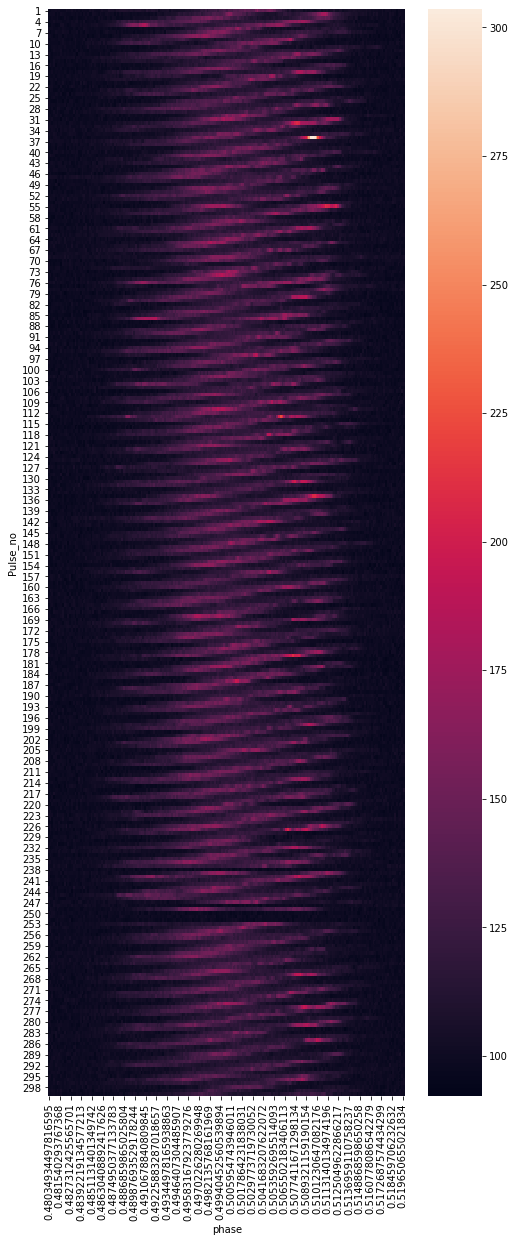

In [ ]:
import seaborn as sns
plt.figure(figsize = (8,20))
plt.xlabel('Phase')
plt.ylabel('Pulse No')
sns.heatmap(data4)

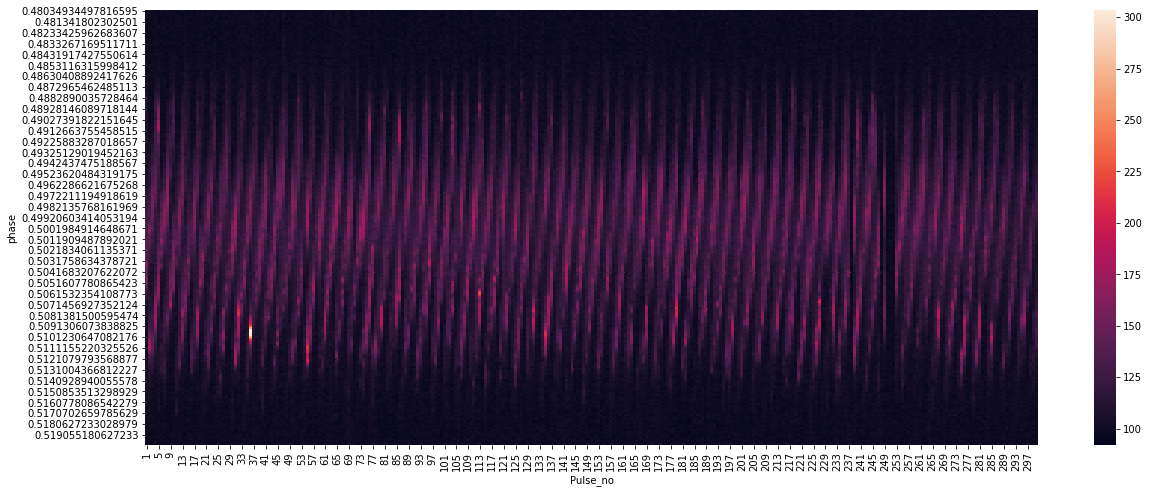

In [ ]:
data5 = np.transpose(data4)
plt.figure(figsize=(20,8))
sns.heatmap(data5)

In [ ]:
row_array = np.average(data5, axis=0)
column_array = np.average(data5, axis=1)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


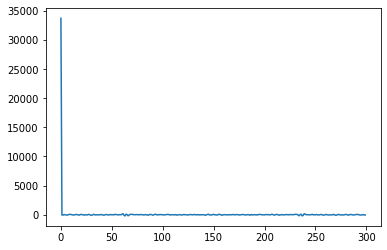

In [ ]:
row_fft = syfp.fft(row_array)
plt.plot(row_fft)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


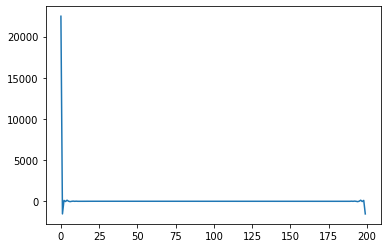

In [ ]:
column_fft = syfp.fft(column_array)
plt.plot(column_fft)
plt.show()

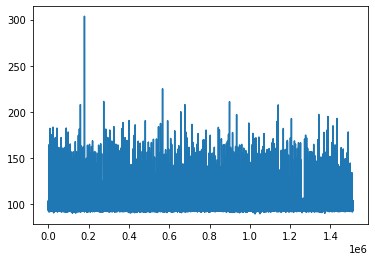

In [ ]:
rowFFT = np.abs(syfp.fft(time_series))
plt.plot(rowFFT)
plt.show()